# Imports

In [24]:
# Import all necessary packages 
# If getting an error, open Terminal and run 'pip install package_name', e.g. pip install pandas
# Alternatively, you can do pip3 install package_name, e.g. pip3 install pandas
# If you are using Jupyter Notebook, you can run '!pip install package_name' in a cell to install the package

import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests
from scipy.stats import pearsonr

# Load the data

In [25]:
# First load the merged dataset
df = pd.read_csv('/data/jkuc/religiousity/Data/journals_qualified_with_liwc.csv') # Change the path to the location of the file on your computer
# Add 
print(df.shape) # Print the shape of the dataframe (rows, columns)
df.head() # Display the first 5 rows of the dataframe

(1710, 152)


,ParticipantID,B_WEMWBS_Total,B_GAD7_Total,B_PHQ9_Total,B_RRS_Total,B_BIS_Motor,B_BIS_Non-Planning,B_BIS_Attention,B_BIS_Total,B_ASQ_Total,...,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji
0,125s,39.0,7.0,9.0,29.0,15.0,13.0,8.0,36.0,5.0,...,0.0,0.0,40.00,20.00,0.0,0.0,0.0,20.00,0.00,0.0
1,125s,39.0,7.0,9.0,29.0,15.0,13.0,8.0,36.0,5.0,...,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0
2,125s,39.0,7.0,9.0,29.0,15.0,13.0,8.0,36.0,5.0,...,0.0,0.0,7.69,7.69,0.0,0.0,0.0,0.00,0.00,0.0
3,125s,39.0,7.0,9.0,29.0,15.0,13.0,8.0,36.0,5.0,...,0.0,0.0,20.00,0.00,0.0,0.0,0.0,20.00,0.00,0.0
4,125s,39.0,7.0,9.0,29.0,15.0,13.0,8.0,36.0,5.0,...,0.0,0.0,21.43,0.00,0.0,0.0,0.0,7.14,14.29,0.0


In [26]:
# View the columns of the dataframe
print(df.columns.tolist())

['ParticipantID', 'B_WEMWBS_Total', 'B_GAD7_Total', 'B_PHQ9_Total', 'B_RRS_Total', 'B_BIS_Motor', 'B_BIS_Non-Planning', 'B_BIS_Attention', 'B_BIS_Total', 'B_ASQ_Total', 'B_NIEQ_ISpeaking', 'B_NIEQ_ISeeing', 'B_NIEQ_Feeling', 'B_NIEQ_SensAw', 'B_NIEQ_UnsTh', 'B_NIEQ_Total', 'B_VISQ_C', 'B_VISQ_D', 'B_VISQ_E', 'B_VISQ_O', 'B_VISQ_P', 'B_VISQ_Total', 'E_WEMWBS_Total', 'E_GAD7_Total', 'E_PHQ9_Total', 'TelegramID', 'StudyGroup', 'Timestamp', 'JournalUniqueID', 'Type', 'EntryCount', 'JournalAnonymised', 'WordCount', 'Segment', 'WC', 'Analytic', 'Clout', 'Authentic', 'Tone', 'WPS', 'BigWords', 'Dic', 'Linguistic', 'function', 'pronoun', 'ppron', 'i', 'we', 'you', 'shehe', 'they', 'ipron', 'det', 'article', 'number', 'prep', 'auxverb', 'adverb', 'conj', 'negate', 'verb', 'adj', 'quantity', 'Drives', 'affiliation', 'achieve', 'power', 'Cognition', 'allnone', 'cogproc', 'insight', 'cause', 'discrep', 'tentat', 'certitude', 'differ', 'memory', 'Affect', 'tone_pos', 'tone_neg', 'emotion', 'emo_pos

# Score the Religious Dictionary

In [27]:
# First need to load the data, you can put it in the corresponding directory into e.g. a txt file
# We need to load it into a list then we can use it to search for religious words in the text
# I created a temporary dictionary with just a few words to test the code
# But you need to replace it with the actual dictionary

with open('/data/jkuc/religiousity/Dictionary/religious_dict.txt') as f:
    religious_words = f.readlines()
    # Remove the newline character ("\n") at the end of each word
    religious_words = [word.strip() for word in religious_words]
    # Lowercase all the words <--- do you want to do this?
    religious_words = [word.lower() for word in religious_words]

religious_words

['god', 'prayer', 'pray', 'church', 'faith', 'devotion']

In [28]:
# Here we define a function that will count the number of religious words in a text
def count_terms(text, terms):
    count = 0
    # Check if string
    if isinstance(text, str):
        text = text.lower()
        for term in terms:
            count += text.lower().count(term)
    return count


# We first want to lowercase all journal entries to make sure the matching works
df['JournalAnonymised'] = df['JournalAnonymised'].str.lower()

# Apply the function to the text column
df['ReligiousWordsCount'] = df['JournalAnonymised'].apply(lambda x: count_terms(x, religious_words))
# Print the table and scroll to the right to see the new column
df.head()

,ParticipantID,B_WEMWBS_Total,B_GAD7_Total,B_PHQ9_Total,B_RRS_Total,B_BIS_Motor,B_BIS_Non-Planning,B_BIS_Attention,B_BIS_Total,B_ASQ_Total,...,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji,ReligiousWordsCount
0,125s,39.0,7.0,9.0,29.0,15.0,13.0,8.0,36.0,5.0,...,0.0,40.00,20.00,0.0,0.0,0.0,20.00,0.00,0.0,0
1,125s,39.0,7.0,9.0,29.0,15.0,13.0,8.0,36.0,5.0,...,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0
2,125s,39.0,7.0,9.0,29.0,15.0,13.0,8.0,36.0,5.0,...,0.0,7.69,7.69,0.0,0.0,0.0,0.00,0.00,0.0,0
3,125s,39.0,7.0,9.0,29.0,15.0,13.0,8.0,36.0,5.0,...,0.0,20.00,0.00,0.0,0.0,0.0,20.00,0.00,0.0,0
4,125s,39.0,7.0,9.0,29.0,15.0,13.0,8.0,36.0,5.0,...,0.0,21.43,0.00,0.0,0.0,0.0,7.14,14.29,0.0,0


In [29]:
# ADDITIONAL COLUMNS

# Create a binary column with 0 if no meditation terms, 1 if there are
df['ReligiousBinary'] = df['ReligiousWordsCount'].apply(lambda x: 1 if x > 0 else 0)
# Proportion of total word count that is religious
df['ReligiousWordsProportion'] = df['ReligiousWordsCount'] / df['WordCount']

df.head()

,ParticipantID,B_WEMWBS_Total,B_GAD7_Total,B_PHQ9_Total,B_RRS_Total,B_BIS_Motor,B_BIS_Non-Planning,B_BIS_Attention,B_BIS_Total,B_ASQ_Total,...,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji,ReligiousWordsCount,ReligiousBinary,ReligiousWordsProportion
0,125s,39.0,7.0,9.0,29.0,15.0,13.0,8.0,36.0,5.0,...,20.00,0.0,0.0,0.0,20.00,0.00,0.0,0,0,0.0
1,125s,39.0,7.0,9.0,29.0,15.0,13.0,8.0,36.0,5.0,...,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0,0,0.0
2,125s,39.0,7.0,9.0,29.0,15.0,13.0,8.0,36.0,5.0,...,7.69,0.0,0.0,0.0,0.00,0.00,0.0,0,0,0.0
3,125s,39.0,7.0,9.0,29.0,15.0,13.0,8.0,36.0,5.0,...,0.00,0.0,0.0,0.0,20.00,0.00,0.0,0,0,0.0
4,125s,39.0,7.0,9.0,29.0,15.0,13.0,8.0,36.0,5.0,...,0.00,0.0,0.0,0.0,7.14,14.29,0.0,0,0,0.0


In [30]:
# Print range of vals in ReligiousWordsCount
print(f"Min religious terms found in a report: {df['ReligiousWordsCount'].min()}")
print(f"Max religious terms found in a report: {df['ReligiousWordsCount'].max()}")

# Print number of reports with >0 meditation terms
# Print the number of reports with religious words
religious_journals = df[df['ReligiousWordsCount'] > 0].shape[0]
total_journals = len(df)
religious_journals_percentage = round(religious_journals/total_journals*100,1)
print(f"Number of reports with at least one religious term: {religious_journals} out of total {total_journals} reports ({religious_journals_percentage}%)")

# Print the number of unique user IDs who used religious words
religious_ids = df[df['ReligiousWordsCount'] > 0]['ParticipantID'].nunique()
total_ids = df['ParticipantID'].nunique()
religious_ids_percentage = round(religious_ids/total_ids*100,1)
print(f"Number of unique user IDs who used religious words: {religious_ids} out of total {total_ids} users ({religious_ids_percentage}%)")

Min religious terms found in a report: 0
Max religious terms found in a report: 18
Number of reports with at least one religious term: 121 out of total 1710 reports (7.1%)
Number of unique user IDs who used religious words: 45 out of total 115 users (39.1%)


In [33]:
# Sort by the number of religious words found in the text
df.sort_values(by='ReligiousWordsCount', ascending=False, inplace=True)

# Print the entries flagged as having religious words, one by one
# Read through the reports, especially the top and bottom ones to see if the matching is correct
for index, row in df[df['ReligiousWordsCount'] > 0].iterrows():
    print(f"Participant ID: {row['ParticipantID']}")
    print(f"Entry ID: {row['JournalUniqueID']}")
    print(f"Timestamp: {row['Timestamp']}")
    print(f"Entry type: {row['Type']}")
    print(f"Number of religious words: {row['ReligiousWordsCount']}")
    print(row['JournalAnonymised'])
    print("----")
    print("\n")

Participant ID: 523r
Entry ID: g83aLGO6zc
Timestamp: 1706474645201.0
Entry type: Voice
Number of religious words: 18
i woke up this morning and i started with my morning devotion. at first thanking god for all he has done in my life in time, passed on what he's going to do in the future to come. medley after doing my morning devotion i went to brush my teeth by taking my toothbrush and the paste, applied it and started brushing my teeth. medley i was truly brushing my teeth. i went to the bedroom to take my morning bat. immediately i was through the morning bat. i came out of the bedroom and came into the living room to think about what to prepare for breakfast. immediately i got an idea on what i wanted to eat for breakfast. i went straight into the kitchen and started preparing breakfast for myself. i prepared breakfast and i ate it. after i prepared it midly i ate it. after i prepared it i started looking for what to wear to church this morning because it was sunday. i found somethi

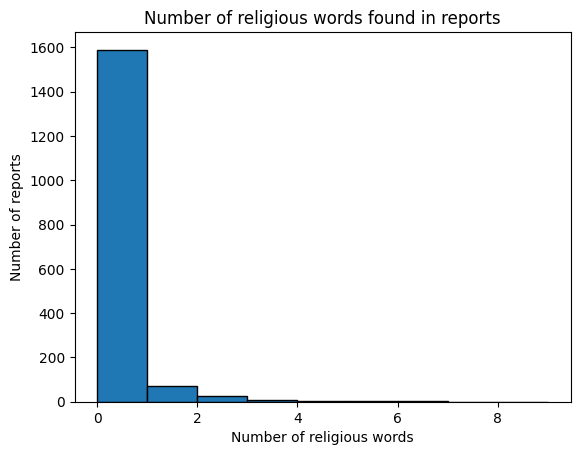

In [34]:
# Histogram with matplotlib
# Plot a histogram of the number of religious words found in the text
plt.hist(df['ReligiousWordsCount'], bins=range(0, 10), edgecolor='black')
plt.xlabel('Number of religious words')
plt.ylabel('Number of reports')
plt.title('Number of religious words found in reports')
plt.show()

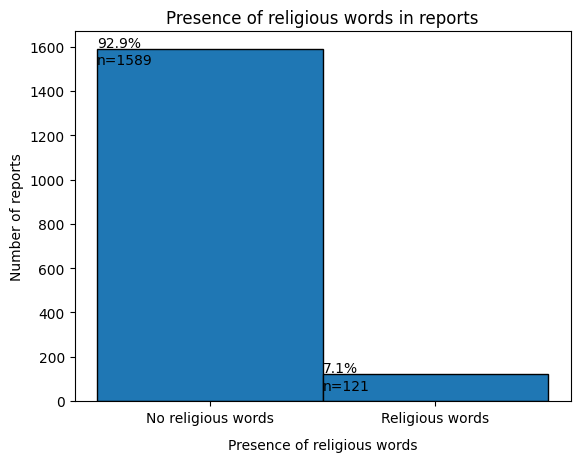

In [35]:
# Histogram with matplotlib
import matplotlib.pyplot as plt

# Plot a histogram of the number of religious words found in the text
plt.hist(df['ReligiousBinary'], bins=range(0, 3), edgecolor='black')
plt.xlabel('Presence of religious words')
# Move down x axis label
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.ylabel('Number of reports')
plt.title('Presence of religious words in reports')
plt.xticks([0.5, 1.5], ['No religious words', 'Religious words'])
# Print value on top of each bar
for i in range(2):
    plt.text(i, df[df['ReligiousBinary'] == i].shape[0] - 70, f"n={df[df['ReligiousBinary'] == i].shape[0]}")
    # Move the text up a bit to avoid overlap
    plt.text(i, df[df['ReligiousBinary'] == i].shape[0] + 10, f"{round(df[df['ReligiousBinary'] == i].shape[0]/total_journals*100,1)}%")
plt.show()

# Correlations with Mental Health Metrics

In [37]:
# To do correlations we need to restructure our table to only contain one row per user
# We can do this by grouping by ParticipantID and aggregating the data

# Define the aggregation functions for each column
aggregations = {
    'ReligiousWordsCount': 'sum',
    'ReligiousBinary': 'max',
    'ReligiousWordsProportion': 'mean',     # Some more thinking needs to happen on how exactly we do that 
                                            # Fow now I suggest we calculate a mean score for each user based on the ReligiousWordsProportion
                                            # We can later decide if this should be a mean weighted by length of the journal entries

    # Below are Mental Health Scores, 
    # we use 'first' to get the first value of each user, 
    # assuming that the scores are the same for each entry of the user
    'B_WEMWBS_Total': 'first',
    'B_GAD7_Total': 'first',
    'B_PHQ9_Total': 'first',              # B stands for baseline and E for Exit questionnaires
    'B_RRS_Total': 'first',               # So they did it either before or after the study
    'B_BIS_Motor': 'first',               # We can also calculate the difference between the two scores
    'B_BIS_Non-Planning': 'first',        # But first try correlations with Exit scores
    'B_BIS_Attention': 'first',
    'B_BIS_Total': 'first',
    'B_ASQ_Total': 'first',
    'B_NIEQ_ISpeaking': 'first',
    'B_NIEQ_ISeeing': 'first',
    'B_NIEQ_Feeling': 'first',
    'B_NIEQ_SensAw': 'first',
    'B_NIEQ_UnsTh': 'first',
    'B_NIEQ_Total': 'first',
    'B_VISQ_C': 'first',
    'B_VISQ_D': 'first',
    'B_VISQ_E': 'first',
    'B_VISQ_O': 'first',
    'B_VISQ_P': 'first',
    'B_VISQ_Total': 'first',
    'E_WEMWBS_Total': 'first',
    'E_GAD7_Total': 'first',
    'E_PHQ9_Total': 'first',
}
    
# Group by ParticipantID and apply the aggregation functions
df_grouped = df.groupby('ParticipantID').agg(aggregations)
df_grouped.head()

,ReligiousWordsCount,ReligiousBinary,ReligiousWordsProportion,B_WEMWBS_Total,B_GAD7_Total,B_PHQ9_Total,B_RRS_Total,B_BIS_Motor,B_BIS_Non-Planning,B_BIS_Attention,...,B_NIEQ_Total,B_VISQ_C,B_VISQ_D,B_VISQ_E,B_VISQ_O,B_VISQ_P,B_VISQ_Total,E_WEMWBS_Total,E_GAD7_Total,E_PHQ9_Total
ParticipantID,,,,,,,,,,,,,,,,,,,,,
001p,6,1,0.001331,35.0,9.0,11.0,38.0,17.0,11.0,6.0,...,385.0,21.0,25.0,39.0,22.0,21.0,115.0,51.0,2.0,1.0
018v,2,1,0.001878,34.0,9.0,8.0,27.0,18.0,9.0,6.0,...,348.0,16.0,21.0,31.0,17.0,19.0,92.0,54.0,2.0,2.0
024s,4,1,0.000949,50.0,5.0,3.0,12.0,15.0,14.0,5.0,...,425.0,26.0,33.0,53.0,13.0,33.0,139.0,52.0,4.0,2.0
053r,0,0,0.000000,59.0,11.0,12.0,33.0,17.0,14.0,6.0,...,311.0,21.0,18.0,34.0,19.0,18.0,100.0,53.0,10.0,14.0
055u,0,0,0.000000,52.0,15.0,17.0,44.0,20.0,16.0,10.0,...,393.5,28.0,30.0,40.0,28.0,28.0,137.0,36.0,10.0,15.0


## Targeted Analysis 

This analysis is important because we first need to test our pre-defined hypothesis. We hypothesize that the religiousity score will be positively correlated with wellbeing (WEMWBS) and negatively correlated with anxiety (GAD7) and depression (PHQ9). We will test this hypothesis by calculating the correlation between the religiousity score and the mental health metrics. The correlation will be calculated using the Pearson correlation coefficient, and p-values will be calculated to determine the significance of the correlation. We need to remember that multiple comparisons are being made, so we will need to adjust the p-values accordingly. Read up on multiple comparisons and the Holm-Bonferroni correction if you are not familiar with this concept. We can move on to exploratory analysis later to look at various inner speech metrics.

In [38]:
# Select only columns of interest for the correlation analysis

columns_of_interest = [
    'ReligiousWordsProportion',
    'E_WEMWBS_Total', 
    'E_GAD7_Total',
    'E_PHQ9_Total',
]

df_filtered = df_grouped[columns_of_interest]

In [39]:
# Correlations between Mental Health Scores and ReligiousWordsProportion
correlations = df_filtered.corr()
correlations = correlations.sort_values(by='ReligiousWordsProportion', ascending=False)
# Remove self-correlation of ReligiousWordsProportion
correlations = correlations.drop('ReligiousWordsProportion', axis=0)
correlations['ReligiousWordsProportion']

E_WEMWBS_Total    0.236571
E_PHQ9_Total     -0.198822
E_GAD7_Total     -0.220963
Name: ReligiousWordsProportion, dtype: float64

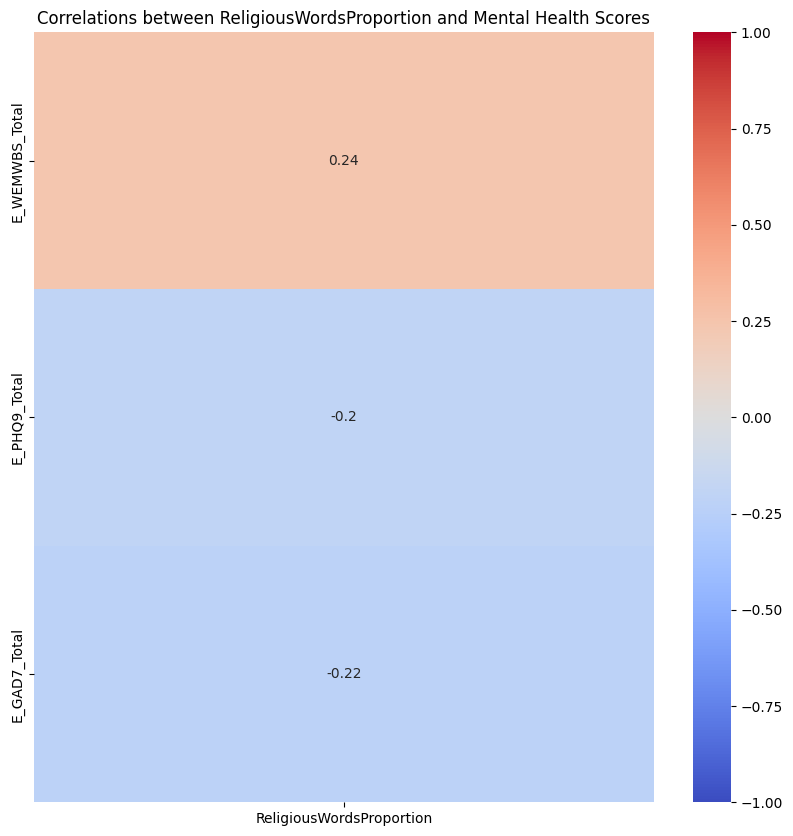

In [40]:
# Heatmap with matplotlib
# Plot a heatmap of the correlations
plt.figure(figsize=(10, 10))
sns.heatmap(correlations[['ReligiousWordsProportion']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlations between ReligiousWordsProportion and Mental Health Scores')
plt.show()

In [41]:
# Now we want to check which of the correlations are statistically significant
# We can do this by calculating the p-values for each correlation

# Calculate the p-values for each correlation
p_values = {}
for column in df_filtered.columns:
    correlation, p_value = pearsonr(df_filtered['ReligiousWordsProportion'], df_filtered[column])
    p_values[column] = p_value

# Convert the p-values to a DataFrame
p_values = pd.DataFrame.from_dict(p_values, orient='index', columns=['p_value'])
p_values = p_values.sort_values(by='p_value')

# Iterate over the p-values and print the significant ones
print("Significant correlations with ReligiousWordsProportion:")
print("------------------------")
for index, row in p_values.iterrows():
    if row['p_value'] < 0.05:
        print(f"{index}: {row['p_value']}")


Significant correlations with ReligiousWordsProportion:
------------------------
ReligiousWordsProportion: 0.0
E_WEMWBS_Total: 0.010913234851484122
E_GAD7_Total: 0.017639850167028792
E_PHQ9_Total: 0.033159387983507115


In [42]:
# Because we're doing multiple comparisons, we should correct the p-values
# We will use Bonferroni Holm correction for multiple comparisons from statsmodels 

# Apply the Bonferroni Holm correction to the p-values
p_values['p_value_corrected'] = multipletests(p_values['p_value'], method='holm')[1]

# Print the corrected p-values
p_values = p_values.sort_values(by='p_value_corrected')
print("Significant correlations with ReligiousWordsProportion_MeanScore (corrected):")
print("------------------------")
for index, row in p_values.iterrows():
    if row['p_value_corrected'] < 0.05:
        print(f"{index}: {row['p_value_corrected']}")

Significant correlations with ReligiousWordsProportion_MeanScore (corrected):
------------------------
ReligiousWordsProportion: 0.0
E_WEMWBS_Total: 0.03273970455445237
E_GAD7_Total: 0.035279700334057584
E_PHQ9_Total: 0.035279700334057584


## Exploratory Analysis

In [43]:
# Exploratory Analysis without selecting the columns of interest
# Correlations between Mental Health Scores and ReligiousWordsProportion
correlations = df_grouped.corr()
correlations = correlations.sort_values(by='ReligiousWordsProportion', ascending=False)
# Remove self-correlation of ReligiousWordsProportion
correlations = correlations.drop('ReligiousWordsProportion', axis=0)
# Probably still want to remove ReligiousWordsCount and ReligiousBinary
correlations = correlations.drop(['ReligiousWordsCount', 'ReligiousBinary'], axis=0)
correlations['ReligiousWordsProportion']

E_WEMWBS_Total        0.236571
B_WEMWBS_Total        0.187150
B_BIS_Non-Planning    0.170508
B_NIEQ_UnsTh          0.148997
B_BIS_Total           0.138050
B_BIS_Attention       0.115589
B_NIEQ_SensAw         0.109066
B_VISQ_E              0.105861
B_NIEQ_Total          0.105363
B_VISQ_D              0.081609
B_BIS_Motor           0.070821
B_NIEQ_ISeeing        0.070113
B_VISQ_P              0.061860
B_NIEQ_ISpeaking      0.056845
B_ASQ_Total           0.044032
B_NIEQ_Feeling        0.030158
B_VISQ_Total          0.026346
B_RRS_Total           0.017316
B_VISQ_C             -0.050612
B_VISQ_O             -0.054838
B_GAD7_Total         -0.109396
B_PHQ9_Total         -0.126029
E_PHQ9_Total         -0.198822
E_GAD7_Total         -0.220963
Name: ReligiousWordsProportion, dtype: float64

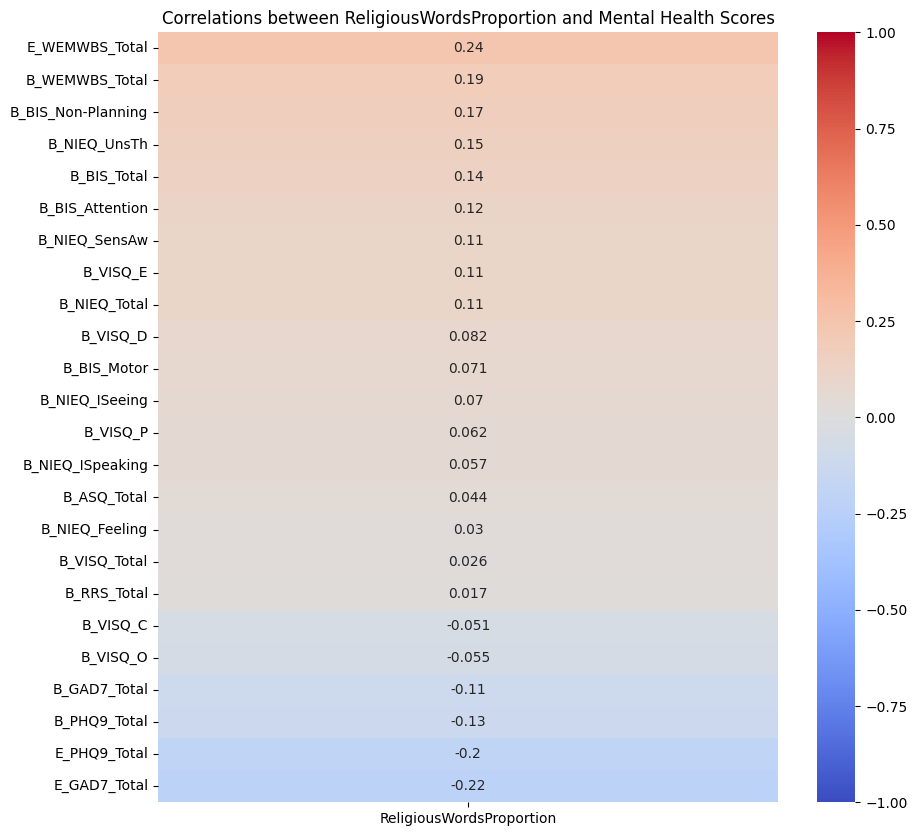

In [44]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlations[['ReligiousWordsProportion']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlations between ReligiousWordsProportion and Mental Health Scores')
plt.show()

# Linear regressions

In [45]:
# Now we want to see if the Religious Score can be used to predict wellbeing
# We will use a linear regression model to predict the WEMWBS score based on the ReligiousWordsProportion
# Using statsmodels ols function

from statsmodels.formula.api import ols
model = ols('E_WEMWBS_Total ~ ReligiousWordsProportion', data=df_grouped).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         E_WEMWBS_Total   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     6.699
Date:                Thu, 16 May 2024   Prob (F-statistic):             0.0109
Time:                        18:06:13   Log-Likelihood:                -414.62
No. Observations:                 115   AIC:                             833.2
Df Residuals:                     113   BIC:                             838.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

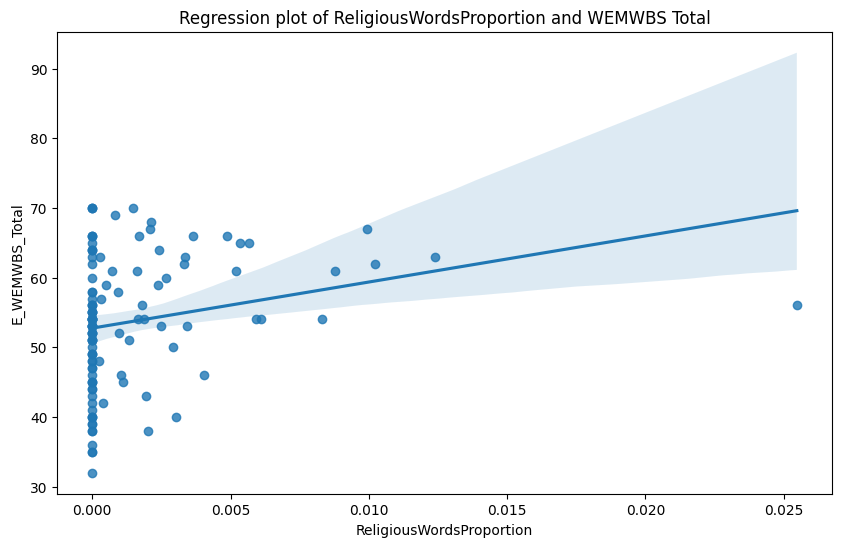

In [46]:
# Print regplot
plt.figure(figsize=(10, 6))
sns.regplot(x='ReligiousWordsProportion', y='E_WEMWBS_Total', data=df_grouped)
plt.title('Regression plot of ReligiousWordsProportion and WEMWBS Total')
plt.show()

# Further Exploration

We may wanna use a Piecewise linear regression - depending on the data after full dictionary scoring.

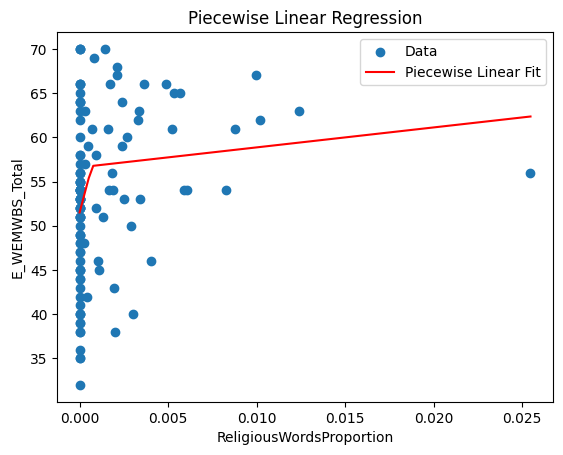

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pwlf

# Example data (replace this with your actual data)
X = np.array(df_grouped['ReligiousWordsProportion'])
Y = np.array(df_grouped['E_WEMWBS_Total'])

# Initialize piecewise linear fit with your data
my_pwlf = pwlf.PiecewiseLinFit(X, Y)

# Fit the data with a specified number of segments
# Here we use 2 segments as an example
res = my_pwlf.fit(2)

# Generate predictions
X_hat = np.linspace(min(X), max(X), 100)
Y_hat = my_pwlf.predict(X_hat)

# Plot the results
plt.scatter(X, Y, label='Data')
plt.plot(X_hat, Y_hat, color='red', label='Piecewise Linear Fit')
plt.xlabel('ReligiousWordsProportion')
plt.ylabel('E_WEMWBS_Total')
plt.title('Piecewise Linear Regression')
plt.legend()
plt.show()

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pwlf
import statsmodels.api as sm

# Example data (replace this with your actual data)
X = np.array(df_grouped['ReligiousWordsProportion'])
Y = np.array(df_grouped['E_WEMWBS_Total'])

# Initialize piecewise linear fit with your data
my_pwlf = pwlf.PiecewiseLinFit(X, Y)

# Fit the data with a specified number of segments
# Here we use 2 segments as an example
res = my_pwlf.fit(2)

# Get the breakpoints
breakpoints = my_pwlf.fit_breaks
print("Breakpoints:", breakpoints)


Breakpoints: [0.         0.00069308 0.02547534]


Segment 1:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2896
Date:                Thu, 16 May 2024   Prob (F-statistic):              0.592
Time:                        18:06:55   Log-Likelihood:                -271.12
No. Observations:                  75   AIC:                             546.2
Df Residuals:                      73   BIC:                             550.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.5197      1.087     47.3

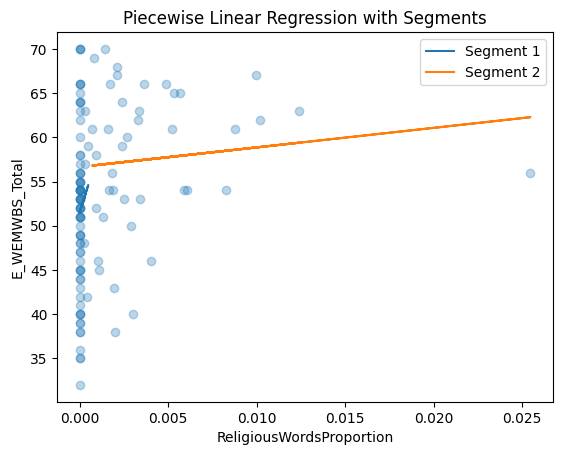

In [51]:
# Function to fit linear model and check significance
def fit_segment(X_segment, Y_segment):
    # Add a constant term for the intercept
    X_segment = sm.add_constant(X_segment)
    # Fit the linear model
    model = sm.OLS(Y_segment, X_segment).fit()
    return model

# Fit models for each segment
segment_models = []
for i in range(len(breakpoints) - 1):
    mask = (X >= breakpoints[i]) & (X <= breakpoints[i+1])
    X_segment = X[mask]
    Y_segment = Y[mask]
    model = fit_segment(X_segment, Y_segment)
    segment_models.append(model)

    # Print the summary of the model
    print(f"Segment {i+1}:")
    print(model.summary())

    # Plot the segment line
    plt.plot(X_segment, model.predict(sm.add_constant(X_segment)), label=f'Segment {i+1}')

# Plot the original data
plt.scatter(X, Y, alpha=0.3)
plt.xlabel('ReligiousWordsProportion')
plt.ylabel('E_WEMWBS_Total')
plt.title('Piecewise Linear Regression with Segments')
plt.legend()
plt.show()
